In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset/Medicaldataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('/kaggle/input/heart-attack-dataset/Medicaldataset.csv')

In [4]:
df.shape

(1319, 9)

In [5]:
df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
5,52,0,61,112,58,87.0,1.83,0.004,negative
6,38,0,40,179,68,102.0,0.71,0.003,negative
7,61,1,60,214,82,87.0,300.00,2.370,positive
8,49,0,60,154,81,135.0,2.35,0.004,negative
9,65,1,61,160,95,100.0,2.84,0.011,negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [7]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [8]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [9]:
result_dict = {'positive': 1,
               'negative': 0
              }

df['Result'] = df['Result'].map(result_dict)

In [10]:
df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0
5,52,0,61,112,58,87.0,1.83,0.004,0
6,38,0,40,179,68,102.0,0.71,0.003,0
7,61,1,60,214,82,87.0,300.00,2.370,1
8,49,0,60,154,81,135.0,2.35,0.004,0
9,65,1,61,160,95,100.0,2.84,0.011,0


In [ ]:
plt.figure(figsize=(8, 6))
heatmap_data = df.corr().round(2)  
sns.heatmap(heatmap_data, annot=True,cmap='viridis')


<Axes: >

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Histogram for Age
sns.histplot(df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Count plot for Gender
sns.countplot(x='Gender', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')

# Histogram for Heart rate
sns.histplot(df['Heart rate'], ax=axes[0, 2])
axes[0, 2].set_title('Heart Rate Distribution')

# Histogram for Systolic blood pressure
sns.histplot(df['Systolic blood pressure'], ax=axes[0, 3])
axes[0, 3].set_title('Systolic BP Distribution')

# Histogram for Diastolic blood pressure
sns.histplot(df['Diastolic blood pressure'], ax=axes[1, 0])
axes[1, 0].set_title('Diastolic BP Distribution')

# Histogram for Blood sugar
sns.histplot(df['Blood sugar'], ax=axes[1, 1])
axes[1, 1].set_title('Blood Sugar Distribution')

# Histogram for CK-MB
sns.histplot(df['CK-MB'], ax=axes[1, 2])
axes[1, 2].set_title('CK-MB Distribution')

# Histogram for Troponin
sns.histplot(df['Troponin'], ax=axes[1, 3])
axes[1, 3].set_title('Troponin Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

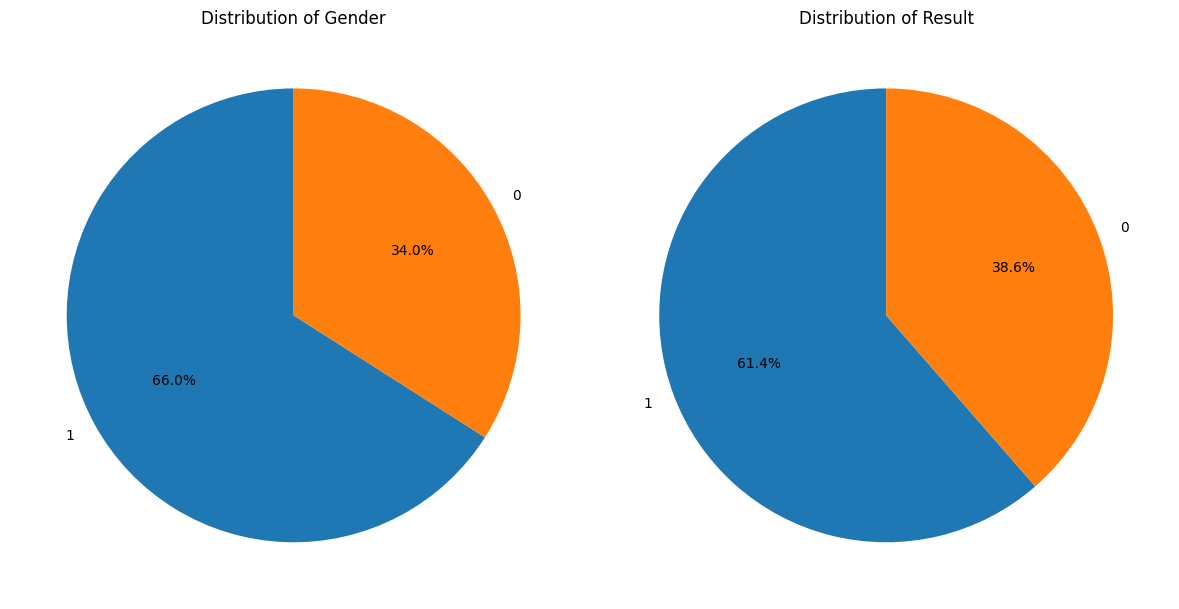

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in 'Gender' and 'Result'
gender_counts = df['Gender'].value_counts()
result_counts = df['Result'].value_counts()

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Pie chart for Gender
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Gender')

# Pie chart for Result
axes[1].pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Result')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


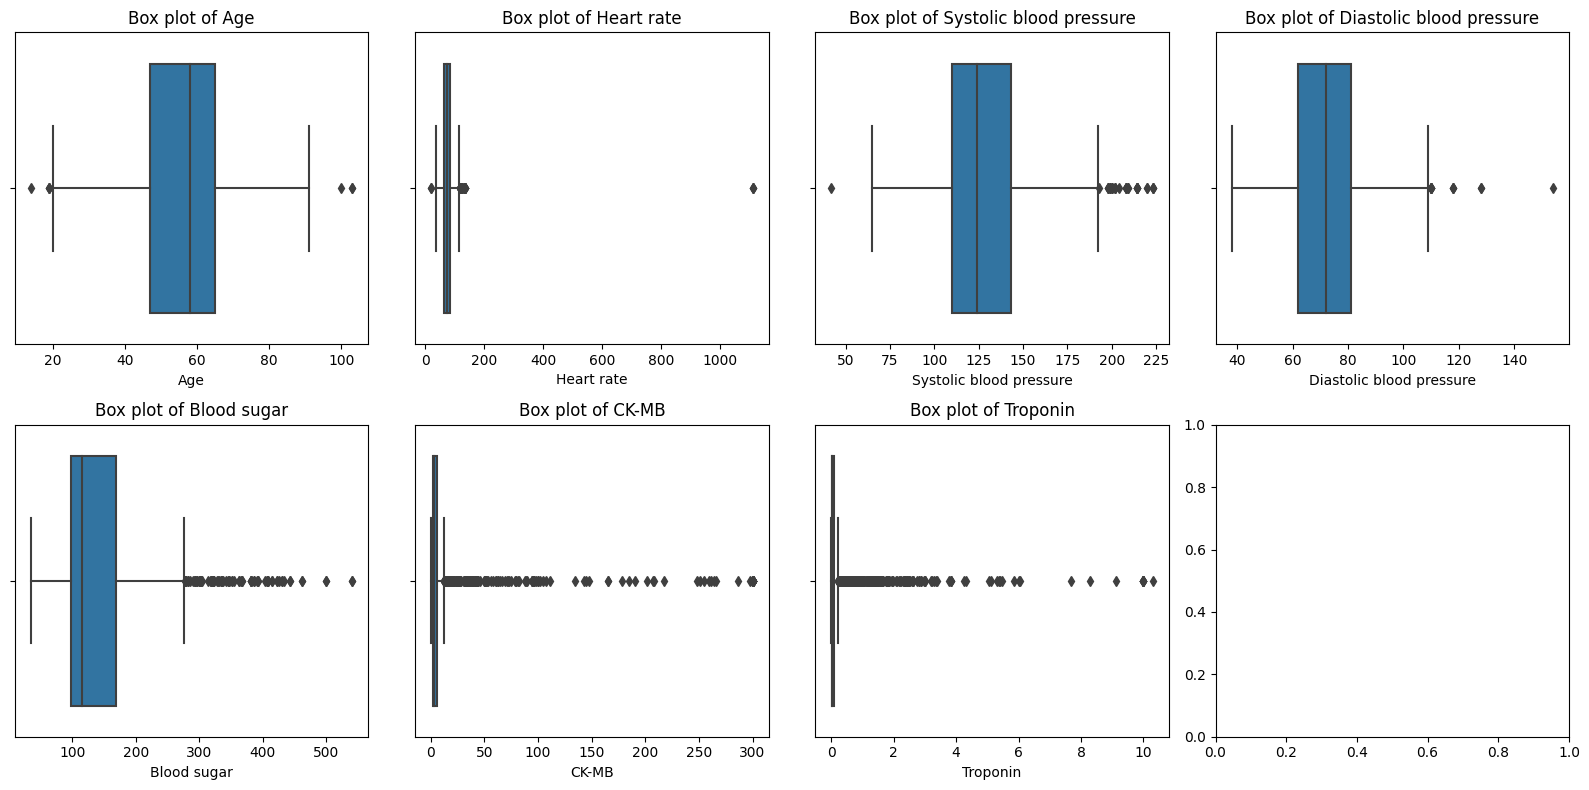

In [14]:

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes = axes.flatten()


columns = ['Age', 'Heart rate', 'Systolic blood pressure', 
           'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']


for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()


In [15]:
x= df.drop(columns=['Result'])  
y = df['Result'] 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9848484848484849

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [20]:
"""
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)"""

# Step 7: Get the probabilities (Risk Score)
risk_scores = rf_model.predict_proba(x_test)[:, 1]  # Probability of positive class (heart attack)
print(f"Predictions: {y_pred}")
print(f"Risk Scores: {risk_scores}")
rf.save('model.h5')

Predictions: [1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 0]
Risk Scores: [0.99 0.97 0.9  0.98 0.13 0.06 0.91 0.98 0.99 0.81 0.99 0.1  0.97 0.83
 1.   1.   0.99 0.99 0.03 0.93 0.07 0.9  0.21 0.99 0.99 0.97 0.1  0.05
 0.98 0.05 0.04 0.03 0.09 0.97 0.97 0.01 0.08 0.1  0.07 0.06 0.99 0.98
 1.   0.02 0.95 0.98 0.97 1.   0.06 0.94 0.96 0.26 0.11 0.98 0.96 0.96
 0.98 0.04 0.99 0.03 0.03 0.93 0.04 0.09 0.91 0.81 0.91 0.94 0.96 0.97
 0.98 0.05 0.98 0.82 0.93 0.06 0.86 0.16 0.99 0.96 0.92 1.   0.88 0.95
 0.93 1.   

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [21]:
import numpy as np

def predict_heart_attack_no_scaling(features, rf_model):
    """
    Predict the outcome and risk score for heart attack based on given features
    without scaling the input data.

    Parameters:
    - features: A list or numpy array with the input feature values.
    - rf_model: Trained Random Forest model.

    Returns:
    - prediction: 'Positive' or 'Negative' based on the prediction.
    - risk_score: Probability of being positive (heart attack).
    """
    # Convert features to a numpy array if it's a list
    features = np.array(features).reshape(1, -1)

    # Get prediction (binary class: 0 for Negative, 1 for Positive)
    y_pred = rf_model.predict(features)

    # Get the risk score (probability of the positive class - heart attack)
    risk_scores = rf_model.predict_proba(features)[:, 1]  # Probability of positive class (1)

    # Convert prediction to 'Positive' or 'Negative'
    prediction = 'Positive' if y_pred[0] == 1 else 'Negative'

    return prediction, risk_scores[0]

# Example usage
# Assuming rf_model is already trained and ready

# Example input features (no scaling needed)
input_features = [
    45,        # Age
    1,         # Gender (1 for Male, 0 for Female)
    80,        # Heart rate
    130,       # Systolic blood pressure
    85,        # Diastolic blood pressure
    100,       # Blood sugar
    12,        # CK-MB (Cardiac Marker)
    0.01       # Troponin (another cardiac marker)
]

# Example: Predict for the given features
prediction, risk_score = predict_heart_attack_no_scaling(input_features, rf_model)

# Print the results
print(f"Prediction: {prediction}")
print(f"Risk Score (Probability of Heart Attack): {risk_score}")


Prediction: Positive
Risk Score (Probability of Heart Attack): 0.93


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
input_features = [45, 1, 80, 130, 85, 100, 12, 0.01]
prediction, risk_score = predict_heart_attack_no_scaling(input_features, rf_model)

print(f"Prediction: {prediction}")
print(f"Risk Score: {risk_score}")


Prediction: Positive
Risk Score: 0.93


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
with open('rf_model.pickle','wb') as f:
    pickle.dump(rf_model,f)

In [ ]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(, scaler_file)

In [23]:
import pickle
with open('rf_model1.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
import joblib
# Assuming rf_model is your trained model
joblib.dump(rf_model, 'rf_model1.pkl')


['rf_model1.pkl']